In [3]:
!pip install torch torchvision

    100% |████████████████████████████████| 484.0MB 25kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5bf6c000 @  0x7fd820b901c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 13.2MB/s 
    100% |████████████████████████████████| 2.0MB 13.5MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [16]:
!pip install Pillow==4.1.1

    100% |████████████████████████████████| 5.7MB 6.3MB/s 
  Found existing installation: Pillow 5.1.0
    Uninstalling Pillow-5.1.0:
      Successfully uninstalled Pillow-5.1.0


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms

import os
import time
import copy
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [19]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip -P data/

--2018-05-21 14:03:00--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 52.85.39.231, 52.85.39.23, 52.85.39.13, ...
Connecting to download.pytorch.org (download.pytorch.org)|52.85.39.231|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘data/hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M  22.0MB/s    in 2.1s    

2018-05-21 14:03:02 (22.0 MB/s) - ‘data/hymenoptera_data.zip’ saved [47286322/47286322]



In [20]:
!ls data

hymenoptera_data.zip


In [21]:
!unzip data/hymenoptera_data.zip -d data/

Archive:  data/hymenoptera_data.zip
   creating: data/hymenoptera_data/
   creating: data/hymenoptera_data/train/
   creating: data/hymenoptera_data/train/ants/
  inflating: data/hymenoptera_data/train/ants/0013035.jpg  
  inflating: data/hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: data/hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: data/hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: data/hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: data/hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: data/hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: data/hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: data/hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: data/hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: data/hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg  
  inflating: data/hymenoptera_data/train/


  inflating: data/hymenoptera_data/val/bees/181171681_c5a1a82ded.jpg  
  inflating: data/hymenoptera_data/val/bees/187130242_4593a4c610.jpg  
  inflating: data/hymenoptera_data/val/bees/203868383_0fcbb48278.jpg  
  inflating: data/hymenoptera_data/val/bees/2060668999_e11edb10d0.jpg  
  inflating: data/hymenoptera_data/val/bees/2086294791_6f3789d8a6.jpg  
  inflating: data/hymenoptera_data/val/bees/2103637821_8d26ee6b90.jpg  
  inflating: data/hymenoptera_data/val/bees/2104135106_a65eede1de.jpg  
  inflating: data/hymenoptera_data/val/bees/215512424_687e1e0821.jpg  
  inflating: data/hymenoptera_data/val/bees/2173503984_9c6aaaa7e2.jpg  
  inflating: data/hymenoptera_data/val/bees/220376539_20567395d8.jpg  
  inflating: data/hymenoptera_data/val/bees/224841383_d050f5f510.jpg  
  inflating: data/hymenoptera_data/val/bees/2321144482_f3785ba7b2.jpg  
  inflating: data/hymenoptera_data/val/bees/238161922_55fa9a76ae.jpg  
  inflating: data/hymenoptera_data/val/bees/2407809945_fb525ef54d.jpg 

In [22]:
data_dir = os.path.join('data', 'hymenoptera_data')
image_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'))
print(len(image_dataset))
image, label = image_dataset[0]

244


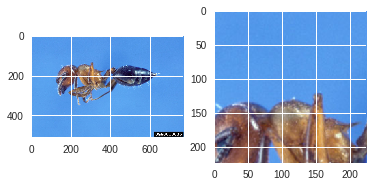

In [23]:
# RandomResizedCrop
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
t = transforms.RandomResizedCrop(224)
trans_image = t(image)
plt.imshow(trans_image)

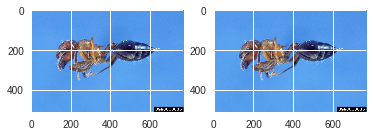

In [24]:
# RandomHorizontalFlip
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
t = transforms.RandomHorizontalFlip()
trans_image = t(image)
plt.imshow(trans_image)

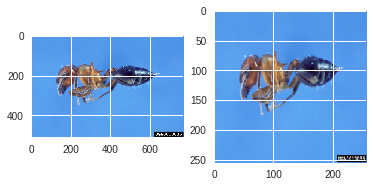

In [25]:
# Resize
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
t = transforms.Resize((256, 256))
trans_image = t(image)
plt.imshow(trans_image)

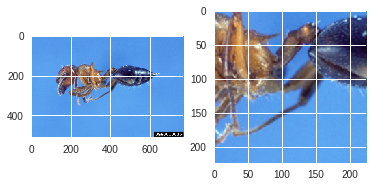

In [26]:
# CenterCrop
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
t = transforms.CenterCrop(224)
trans_image = t(image)
plt.imshow(trans_image)

In [0]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [0]:
data_dir = os.path.join('data', 'hymenoptera_data')
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x],
                                              batch_size=4,
                                              shuffle=True,
                                              num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

In [29]:
print(image_datasets['train'])
print(image_datasets['val'])
print(dataloaders['train'])
print(dataloaders['val'])
print(dataset_sizes)
print(class_names)

Dataset ImageFolder
    Number of datapoints: 244
    Root Location: data/hymenoptera_data/train
    Transforms (if any): Compose(
                             RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
                             RandomHorizontalFlip(p=0.5)
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         )
    Target Transforms (if any): None
Dataset ImageFolder
    Number of datapoints: 153
    Root Location: data/hymenoptera_data/val
    Transforms (if any): Compose(
                             Resize(size=(256, 256), interpolation=PIL.Image.BILINEAR)
                             CenterCrop(size=(224, 224))
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         )
    Target Transforms (if any): None
{'tr

torch.Size([4, 3, 224, 224]) torch.Size([4])


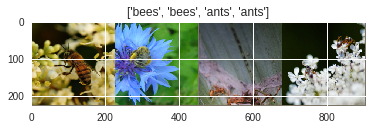

In [30]:
def imshow(images, title=None):
    images = images.numpy().transpose((1, 2, 0))  # (h, w, c)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    images = std * images + mean
    images = np.clip(images, 0, 1)
    plt.imshow(images)
    if title is not None:
        plt.title(title)

images, classes = next(iter(dataloaders['train']))
print(images.size(), classes.size())  # torch.Size([4, 3, 224, 224]) torch.Size([4])
images = torchvision.utils.make_grid(images)
imshow(images, title=[class_names[x] for x in classes])

In [0]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        # 各エポックで訓練+バリデーションを実行
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train(True)   # training mode
            else:
                model.train(False)  # evaluate mode
            
            running_loss = 0.0
            running_corrects = 0
            
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()

                # 訓練のときだけ履歴を保持する
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            # サンプル数で割って平均を求める
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
            
            # deep copy the model
            # 精度が改善したらモデルを保存する
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        
        print()
    
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val acc: {:.4f}'.format(best_acc))
    
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [32]:
model_ft = models.resnet18(pretrained=True)
print(model_ft)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /content/.torch/models/resnet18-5c106cde.pth
13.9%

100.0%


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [33]:
num_features = model_ft.fc.in_features
print(num_features)

512


In [34]:
# fc層を置き換える
model_ft.fc = nn.Linear(num_features, 2)
print(model_ft)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [35]:
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
# 7エポックごとに学習率を0.1倍する
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)
torch.save(model_ft.state_dict(), 'model_ft.pkl')

Epoch 0/24
----------
train Loss: 0.5370 Acc: 0.7008
val Loss: 0.4465 Acc: 0.8235

Epoch 1/24
----------
train Loss: 0.8833 Acc: 0.7254
val Loss: 0.7642 Acc: 0.7516

Epoch 2/24
----------
train Loss: 0.4503 Acc: 0.8484
val Loss: 0.4312 Acc: 0.8627

Epoch 3/24
----------
train Loss: 0.9036 Acc: 0.7131
val Loss: 0.3301 Acc: 0.8693

Epoch 4/24
----------
train Loss: 0.6533 Acc: 0.7992
val Loss: 0.3296 Acc: 0.8693

Epoch 5/24
----------
train Loss: 0.3569 Acc: 0.8402
val Loss: 0.3056 Acc: 0.8889

Epoch 6/24
----------
train Loss: 0.4508 Acc: 0.8156
val Loss: 0.6323 Acc: 0.8235

Epoch 7/24
----------
train Loss: 0.4357 Acc: 0.8238
val Loss: 0.2700 Acc: 0.8889

Epoch 8/24
----------
train Loss: 0.2669 Acc: 0.9016
val Loss: 0.2546 Acc: 0.9020

Epoch 9/24
----------
train Loss: 0.3344 Acc: 0.8648
val Loss: 0.2567 Acc: 0.9085

Epoch 10/24
----------
train Loss: 0.3264 Acc: 0.8484
val Loss: 0.2842 Acc: 0.9085

Epoch 11/24
----------
train Loss: 0.2756 Acc: 0.8730
val Loss: 0.2407 Acc: 0.9085

Ep

In [0]:
def visualize_model(model, num_images=6):
    images_so_far = 0
    fig = plt.figure()
    
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs.data, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images // 2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    return

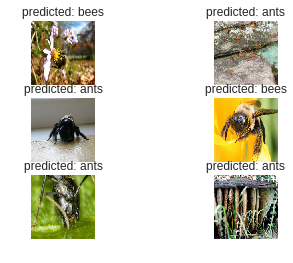

In [37]:
visualize_model(model_ft)

In [0]:
# 訓練済みResNet18をロード
model_conv = torchvision.models.resnet18(pretrained=True)

# すべてのパラメータを固定
for param in model_conv.parameters():
    param.requires_grad = False

# 最後のfc層を置き換える
# これはデフォルトの requires_grad=True のままなのでパラメータ更新対象
num_features = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_features, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Optimizerの第1引数には更新対象のfc層のパラメータのみ指定
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [39]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.7010 Acc: 0.6311
val Loss: 0.5648 Acc: 0.7516

Epoch 1/24
----------
train Loss: 0.5814 Acc: 0.7418
val Loss: 0.2054 Acc: 0.9346

Epoch 2/24
----------
train Loss: 0.4547 Acc: 0.7869
val Loss: 0.2772 Acc: 0.8889

Epoch 3/24
----------
train Loss: 0.4683 Acc: 0.7582
val Loss: 0.5455 Acc: 0.7778

Epoch 4/24
----------
train Loss: 0.6028 Acc: 0.7295
val Loss: 0.3594 Acc: 0.8562

Epoch 5/24
----------
train Loss: 0.6013 Acc: 0.7869
val Loss: 0.1848 Acc: 0.9542

Epoch 6/24
----------
train Loss: 0.5122 Acc: 0.7992
val Loss: 0.3519 Acc: 0.8889

Epoch 7/24
----------
train Loss: 0.3478 Acc: 0.8320
val Loss: 0.2397 Acc: 0.9216

Epoch 8/24
----------
train Loss: 0.2572 Acc: 0.8566
val Loss: 0.1994 Acc: 0.9412

Epoch 9/24
----------
train Loss: 0.3030 Acc: 0.8689
val Loss: 0.1852 Acc: 0.9608

Epoch 10/24
----------
train Loss: 0.3211 Acc: 0.8730
val Loss: 0.2394 Acc: 0.9216

Epoch 11/24
----------
train Loss: 0.3554 Acc: 0.8525
val Loss: 0.1844 Acc: 0.9412

Ep

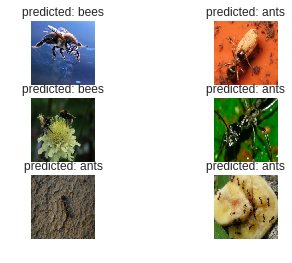

In [40]:
visualize_model(model_conv)